<a href="https://colab.research.google.com/github/Dollyp1205/Marketing-Research-Methods---Dolly-Poddar--Jio-Institute/blob/Session-10/Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

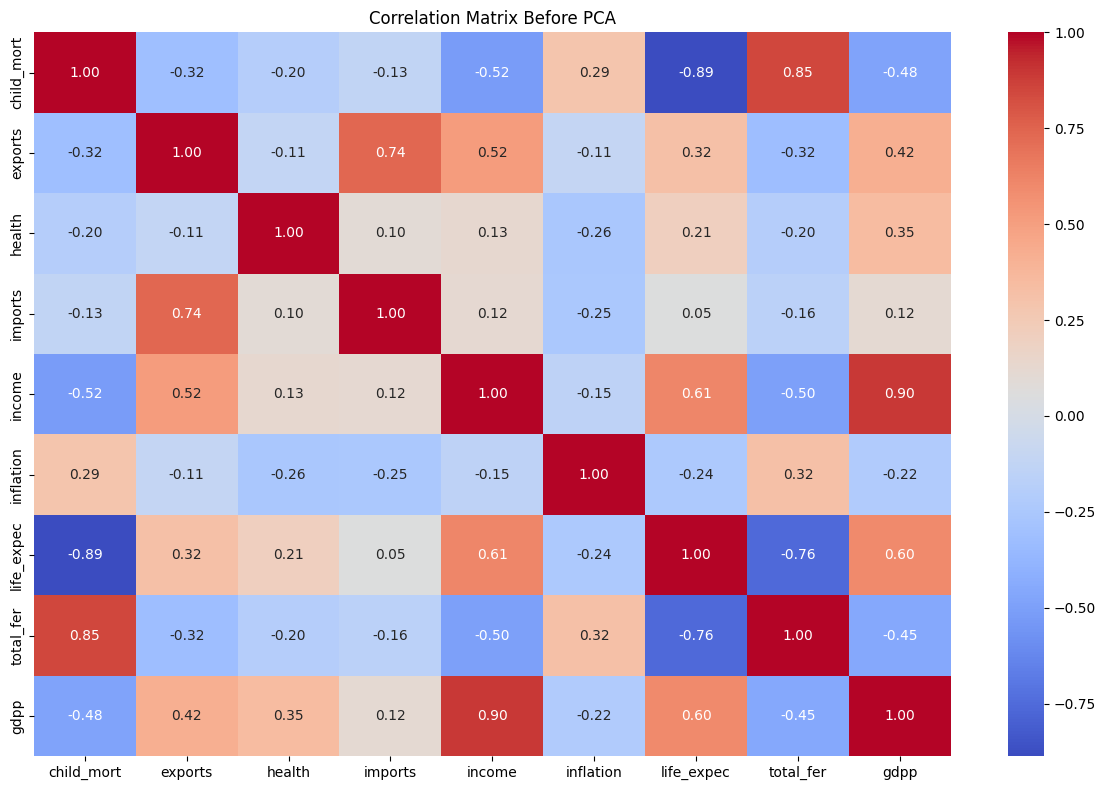

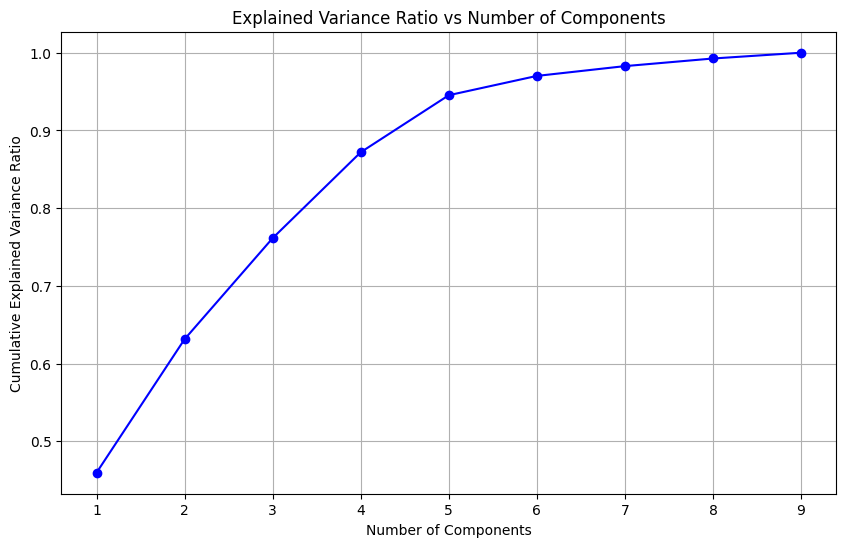


Optimal number of components explaining 85% variance: 4

Explained variance ratio by component:
PC1: 0.460
PC2: 0.172
PC3: 0.130
PC4: 0.111
PC5: 0.073
PC6: 0.025
PC7: 0.013
PC8: 0.010
PC9: 0.007


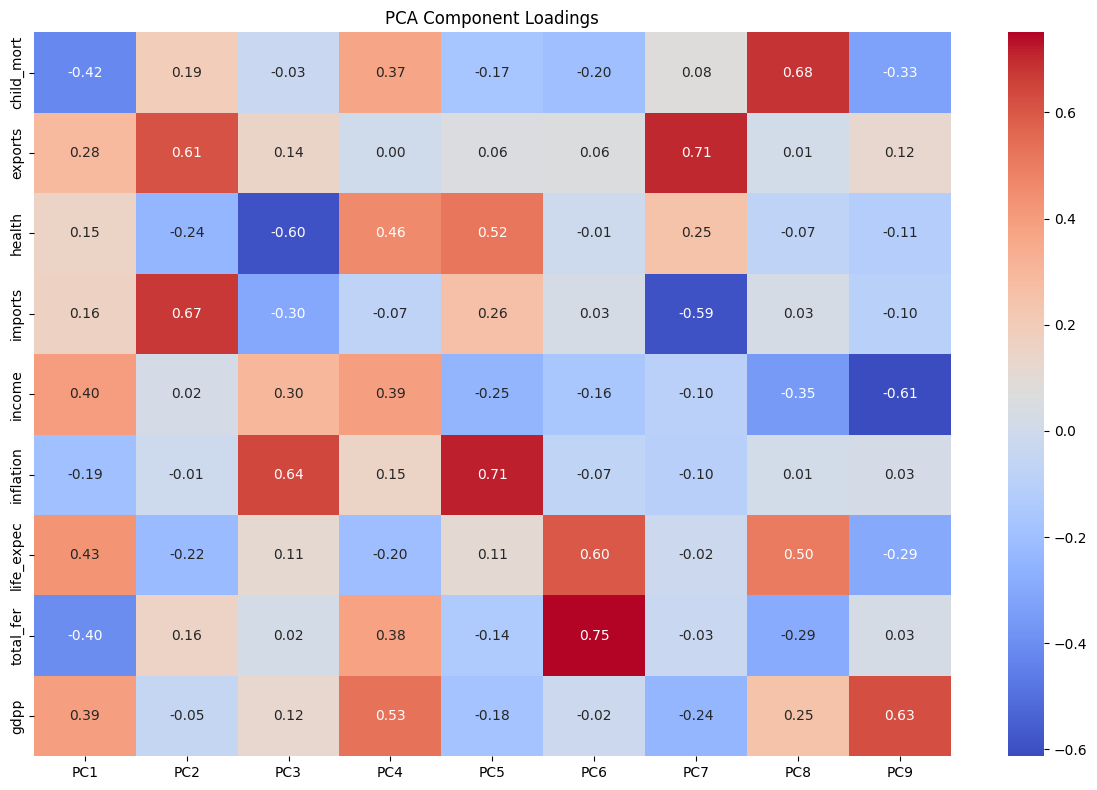


Feature groups in principal components:

PC1 significant features:
['child_mort', 'income', 'life_expec', 'total_fer', 'gdpp']

Correlation between features in PC1:
            child_mort  income  life_expec  total_fer   gdpp
child_mort       1.000  -0.524      -0.887      0.848 -0.483
income          -0.524   1.000       0.612     -0.502  0.896
life_expec      -0.887   0.612       1.000     -0.761  0.600
total_fer        0.848  -0.502      -0.761      1.000 -0.455
gdpp            -0.483   0.896       0.600     -0.455  1.000

PC2 significant features:
['exports', 'imports']

Correlation between features in PC2:
         exports  imports
exports    1.000    0.737
imports    0.737    1.000

PC3 significant features:
['health', 'income', 'inflation']

Correlation between features in PC3:
           health  income  inflation
health      1.000   0.130     -0.255
income      0.130   1.000     -0.148
inflation  -0.255  -0.148      1.000

PC4 significant features:
['child_mort', 'health', 'in

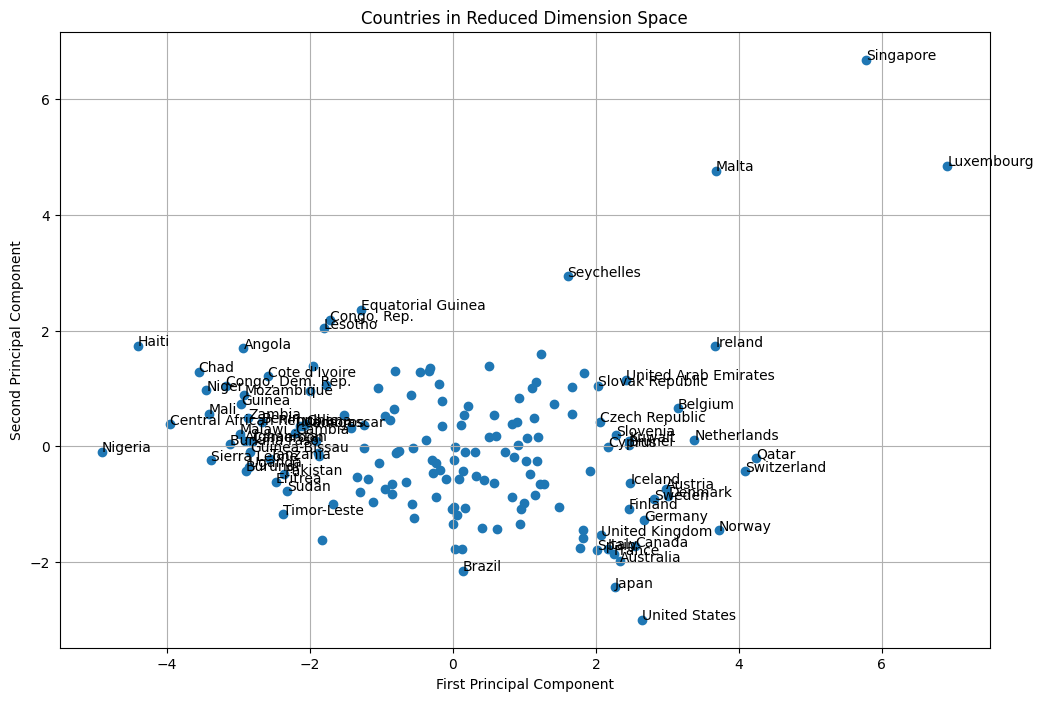


Key Insights for Aid Distribution:
--------------------------------------------------

Top 15 Most Vulnerable Countries (Based on Combined PCA Scores):
                  country  vulnerability_score
91             Luxembourg             3.974770
133             Singapore             3.302381
123                 Qatar             2.520095
98                  Malta             1.730652
23                 Brunei             1.568305
114                Norway             1.481577
82                 Kuwait             1.478715
73                Ireland             1.466027
145           Switzerland             1.426155
157  United Arab Emirates             1.420893
49      Equatorial Guinea             1.146713
110           Netherlands             1.074941
15                Belgium             1.064251
44                Denmark             0.899103
115                  Oman             0.894002

Country Clusters (Regions with Similar Characteristics):

Cluster 1:
['Albania', 'Algeria', 'A

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Read the data
df = pd.read_csv('/content/pca.csv')

# Create a copy of original data for later use
original_df = df.copy()

# Separate features for PCA (excluding country column)
features = ['child_mort', 'exports', 'health', 'imports', 'income',
           'inflation', 'life_expec', 'total_fer', 'gdpp']

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])
scaled_df = pd.DataFrame(scaled_features, columns=features)

# Correlation Analysis before PCA
plt.figure(figsize=(12, 8))
sns.heatmap(scaled_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Before PCA')
plt.tight_layout()
plt.show()

# Perform PCA
pca = PCA()
pca_features = pca.fit_transform(scaled_features)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs Number of Components')
plt.grid(True)
plt.show()

# Determine optimal number of components (threshold = 0.85)
n_components = np.argmax(cumulative_variance_ratio >= 0.85) + 1
print(f"\nOptimal number of components explaining 85% variance: {n_components}")

# Get component loadings
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(features))],
    index=features
)

# Print explained variance for each component
print("\nExplained variance ratio by component:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.3f}")

# Create heatmap of component loadings
plt.figure(figsize=(12, 8))
sns.heatmap(loadings, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('PCA Component Loadings')
plt.tight_layout()
plt.show()

# Perform PCA with optimal number of components
pca_optimal = PCA(n_components=n_components)
pca_transformed = pca_optimal.fit_transform(scaled_features)

# Create dataframe with reduced dimensions
pca_df = pd.DataFrame(
    pca_transformed,
    columns=[f'PC{i+1}' for i in range(n_components)]
)
pca_df['country'] = df['country']

# Analyze feature groups in each principal component
print("\nFeature groups in principal components:")
for i in range(n_components):
    pc_loadings = loadings[f'PC{i+1}'].abs()
    significant_features = pc_loadings[pc_loadings > 0.3].index.tolist()
    print(f"\nPC{i+1} significant features:")
    print(significant_features)

    # Calculate correlation between original features in this group
    if len(significant_features) > 1:
        print(f"\nCorrelation between features in PC{i+1}:")
        correlation = df[significant_features].corr()
        print(correlation.round(3))

# Post-merger analysis
# Calculate composite scores for each country
composite_scores = pca_df.iloc[:, :n_components].copy()
for i in range(n_components):
    weights = loadings[f'PC{i+1}']
    composite_scores[f'Composite_PC{i+1}'] = np.dot(scaled_df, weights)

# Add country names
composite_scores['country'] = df['country']

# Identify countries needing most urgent aid based on components
# We'll focus on negative scores as they typically indicate worse conditions
print("\nTop 10 Countries Needing Most Urgent Aid:")
for i in range(n_components):
    print(f"\nBased on PC{i+1}:")
    top_countries = composite_scores.nlargest(10, f'Composite_PC{i+1}')[['country', f'Composite_PC{i+1}']]
    print(top_countries)

# Create visualization of countries in reduced dimension space
if n_components >= 2:
    plt.figure(figsize=(12, 8))
    plt.scatter(pca_df['PC1'], pca_df['PC2'])

    # Add country labels for extreme points
    for idx, row in pca_df.iterrows():
        if abs(row['PC1']) > 2 or abs(row['PC2']) > 2:
            plt.annotate(row['country'], (row['PC1'], row['PC2']))

    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title('Countries in Reduced Dimension Space')
    plt.grid(True)
    plt.show()

# Save results
results = pd.DataFrame({
    'country': df['country'],
    'original_features': [features] * len(df),
    'reduced_components': [loadings.columns[:n_components].tolist()] * len(df)
})

for i in range(n_components):
    results[f'PC{i+1}_score'] = pca_transformed[:, i]

results.to_csv('pca_analysis_results.csv', index=False)

# Additional insights for NGO decision making
print("\nKey Insights for Aid Distribution:")
print("-" * 50)

# Calculate overall vulnerability score
vulnerability_score = composite_scores.iloc[:, :n_components].mean(axis=1)
composite_scores['vulnerability_score'] = vulnerability_score

# Identify most vulnerable countries
print("\nTop 15 Most Vulnerable Countries (Based on Combined PCA Scores):")
most_vulnerable = composite_scores.nlargest(15, 'vulnerability_score')[['country', 'vulnerability_score']]
print(most_vulnerable)

# Group countries by regions (if patterns exist)
# Note: This is a simplified regional grouping based on statistical clustering
from sklearn.cluster import KMeans

# Perform clustering on PCA results
kmeans = KMeans(n_clusters=4, random_state=42)
composite_scores['cluster'] = kmeans.fit_predict(pca_transformed)

print("\nCountry Clusters (Regions with Similar Characteristics):")
for cluster in range(4):
    print(f"\nCluster {cluster + 1}:")
    print(composite_scores[composite_scores['cluster'] == cluster]['country'].tolist())

# Save detailed results
detailed_results = pd.DataFrame({
    'country': df['country'],
    'vulnerability_score': vulnerability_score,
    'cluster': composite_scores['cluster']
})
detailed_results = detailed_results.sort_values('vulnerability_score', ascending=False)
detailed_results.to_csv('aid_priority_analysis.csv', index=False)